In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = l1_regularizer,
    mask = False))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 100, Accuracy: 0.8333333333333334, Loss: 0.6721153259277344
Checkpoint 200, Accuracy: 0.8333333333333334, Loss: 0.6712738319679543


C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


could not broadcast input array from shape (3,3) into shape (3)
Checkpoint 300, Accuracy: 0.8333333333333334, Loss: 0.6707515010127315
Checkpoint 400, Accuracy: 0.8333333333333334, Loss: 0.6707515010127315
Checkpoint 500, Accuracy: 0.8333333333333334, Loss: 0.6707515010127315


In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.8481809 ]
 [0.1073807 ]
 [0.04443843]]
[0. 1. 0.] <-> [[0.2980929]
 [0.3397915]
 [0.3621156]]
[0. 0. 1.] <-> [[0.47255513]
 [0.29041594]
 [0.23702894]]
[1. 0. 0.] <-> [[0.8391594 ]
 [0.11290358]
 [0.04793695]]
[0. 0. 1.] <-> [[0.8779125 ]
 [0.08867238]
 [0.03341512]]
[0. 1. 0.] <-> [[0.6374382 ]
 [0.22138801]
 [0.14117382]]
[1. 0. 0.] <-> [[0.6367612 ]
 [0.22170787]
 [0.14153096]]
[1. 0. 0.] <-> [[0.8747361 ]
 [0.09071077]
 [0.03455307]]
[0. 1. 0.] <-> [[0.20372623]
 [0.35058075]
 [0.445693  ]]
[1. 0. 0.] <-> [[0.8301975 ]
 [0.11832436]
 [0.05147811]]
[1. 0. 0.] <-> [[0.7062687 ]
 [0.18736623]
 [0.10636506]]
[1. 0. 0.] <-> [[0.5728908 ]
 [0.2505747 ]
 [0.17653441]]
[1. 0. 0.] <-> [[0.7618328 ]
 [0.15770401]
 [0.08046312]]
[0. 0. 1.] <-> [[0.87264806]
 [0.09204533]
 [0.03530662]]
[1. 0. 0.] <-> [[0.84064484]
 [0.11199886]
 [0.04735629]]
[0. 1. 0.] <-> [[0.72661746]
 [0.17673534]
 [0.09664719]]
[0. 1. 0.] <-> [[0.76406807]
 [0.15646836]
 [0.07946354]]
[1. 0. 0.] <-> [[

C:\Users\tcumi\Anaconda3\envs\py_3_6\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


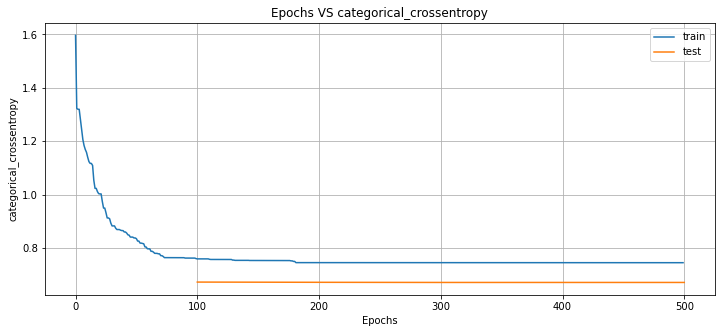

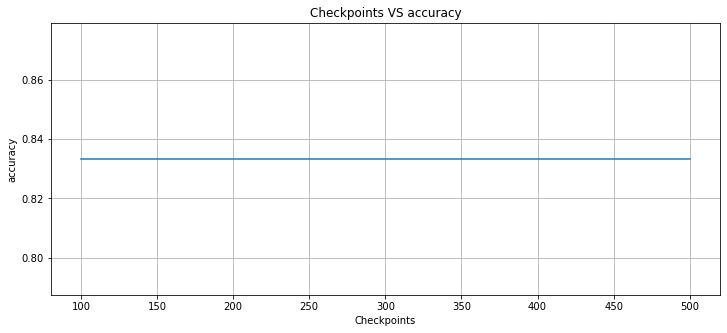

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [12]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8333333333333334, 'mean_square_error': 2.7904480490244254, 'categorical_crossentropy': 0.6721153259277344, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 23, 'tn_hit': 7, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 3, 'fp_hit': 4, 'tn_hit': 90, 'fn_hit': 11}}, 'checkpoint': 100} 


{'accuracy': 0.8333333333333334, 'mean_square_error': 2.832570538436038, 'categorical_crossentropy': 0.6712738319679543, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 23, 'tn_hit': 7, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 3, 'fp_hit': 4, 'tn_hit': 90, 'fn_hit': 11}}, 'checkpoint': 200} 


{'accuracy': 0.8333333333333334, 'mean_square_error': 2.8454629055474077, 'categorical_crossentropy': 0.6707515010127315, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 23, 'tn_hit': 7, 'fn_hit': 0}, 1: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 16}, 2: {'tp_hit': 3, 'fp_hit': 4, 'tn_hit': 90, 'fn_hit

In [13]:
print(model)

Layer 1
Neuron 0: weights:
[[ 0.19678716]
 [-0.02376489]
 [ 0.07649919]
 [ 0.0340112 ]
 [ 0.14413476]]
 bias: [-0.01473382]

Neuron 1: weights:
[[ 0.10480461]
 [ 0.24246562]
 [ 0.02377283]
 [-0.01111655]
 [ 0.04718341]]
 bias: [0.01936136]

Neuron 2: weights:
[[ 0.04026125]
 [-0.09805465]
 [-0.00471177]
 [ 0.21011059]
 [ 0.0175538 ]]
 bias: [0.2100214]

Neuron 3: weights:
[[-0.4557993 ]
 [-0.05290074]
 [-0.01243138]
 [-0.01999651]
 [-0.4788107 ]]
 bias: [1.0373346]

$
Layer 2
Neuron 0: weights:
[[-0.62281245]
 [-0.3261279 ]
 [-0.06288116]
 [ 2.2113297 ]]
 bias: [-0.01421646]

Neuron 1: weights:
[[ 0.06157263]
 [ 0.02145094]
 [ 0.01977167]
 [-0.50462157]]
 bias: [-0.02773898]

Neuron 2: weights:
[[ 0.3251397 ]
 [ 0.19133314]
 [-0.0565003 ]
 [-1.7025425 ]]
 bias: [0.0596412]

$

